# Exploring Ebay Car Sales Data
In this  project, we'll work with a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website. Our objective in this project is to explore the car sales data and extract meaningful info, like -
* which car brands are more common than others
* which car brands are costlier on an average, and which ones are cheaper
* which car brands have run more kms on average than others
* whether cars running on a particular fuel cost less
* whether cars running on a particulat fuel have run more kms

The data was uploaded on Kaggle.com, link for which is provided below -
https://www.kaggle.com/orgesleka/used-cars-database/data

The data-set for this analysis consists of 50,000 rows and 20 columns of car-sales data from Ebay.

Let us cut to the chase, and start by importing the libraries we need and reading the dataset using pandas library.

In [1]:
import pandas, numpy

In [2]:
autos = pandas.read_csv('autos.csv', encoding = 'Latin-1')
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [3]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [4]:
autos.describe(include = 'all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-30 17:37:35,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


### Observations Thus Far
* Total 20 Distinct Field (Column) Names in the Ebay data-set
* Total 5000 Rows in the Ebay data-set
* Many columns like - `vehicleType`, `gearbox`, `model`, `fuelType` and `notRepairedDamage` - have null values
* Style of defining a column-name is Camelcase (instead of my, and python's favourite - Snakecase)
* Many columns like - `odometer`, `nameCrawled`, `price`, `dateCreated` - are numeric type values which are stored as text (which will need to be changed in order to do our analysis)


Also, the following columns have only 2 distinct values - 
* `seller`
* `offerType`
* `abtest`
* `notRepairedDamage`

We'll check to see the distinct count of the types of values in each of these columns (to decide whether any of these columns can be excluded from our analysis) - 


In [5]:
autos.rename({
    'yearOfRegistration':'registration_year',
    'monthOfRegistration':'registration_month',
    'notRepairedDamage':'unrepaired_damage',
    'dateCreated':'ad_created',
    'dateCrawled': 'date_crawled',
    'offerType':'offer_type',
    'vehicleType':'vehicle_type',
    'fuelType':'fuel_type',
    'nrOfPictures':'nr_of_pictures',
    'postalCode':'postal_code',
    'lastSeen':'last_seen',
    'powerPS':'power_ps'
                },axis = 1,inplace = True)

Checking if desired changes have been made in column names -

In [6]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_crawled        50000 non-null  object
 1   name                50000 non-null  object
 2   seller              50000 non-null  object
 3   offer_type          50000 non-null  object
 4   price               50000 non-null  object
 5   abtest              50000 non-null  object
 6   vehicle_type        44905 non-null  object
 7   registration_year   50000 non-null  int64 
 8   gearbox             47320 non-null  object
 9   power_ps            50000 non-null  int64 
 10  model               47242 non-null  object
 11  odometer            50000 non-null  object
 12  registration_month  50000 non-null  int64 
 13  fuel_type           45518 non-null  object
 14  brand               50000 non-null  object
 15  unrepaired_damage   40171 non-null  object
 16  ad_created          50

In [7]:
autos['seller'].value_counts()

privat        49999
gewerblich        1
Name: seller, dtype: int64

In [8]:
autos['offer_type'].value_counts()

Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64

In [9]:
autos['abtest'].value_counts()

test       25756
control    24244
Name: abtest, dtype: int64

In [10]:
autos['unrepaired_damage'].value_counts()

nein    35232
ja       4939
Name: unrepaired_damage, dtype: int64

The 'offer_type' and 'seller' values need a deeper dive -


In [11]:
autos[autos['seller']=='gewerblich']

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
7738,2016-03-15 18:06:22,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,gewerblich,Angebot,$100,control,kombi,2000,manuell,0,megane,"150,000km",8,benzin,renault,NaN,2016-03-15 00:00:00,0,65232,2016-04-06 17:15:37


On introspection, this row turns out to be the only row with `seller` = 'gewerblich' and `offer_type` = 'Gesuch'.
Every other row of `seller` has value =  'privat' and `offer_type` has value = 'Angebot'. Thus, excluding this single row out of 5000 rows will allow us to limit our analysis to 18 columns instead of 20 columns.

Thus, we shall remove it from our data-set -

In [12]:
autos = autos[autos['seller']=='privat']
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_crawled        49999 non-null  object
 1   name                49999 non-null  object
 2   seller              49999 non-null  object
 3   offer_type          49999 non-null  object
 4   price               49999 non-null  object
 5   abtest              49999 non-null  object
 6   vehicle_type        44904 non-null  object
 7   registration_year   49999 non-null  int64 
 8   gearbox             47319 non-null  object
 9   power_ps            49999 non-null  int64 
 10  model               47241 non-null  object
 11  odometer            49999 non-null  object
 12  registration_month  49999 non-null  int64 
 13  fuel_type           45517 non-null  object
 14  brand               49999 non-null  object
 15  unrepaired_damage   40171 non-null  object
 16  ad_created          49

## Converting str columns to numeric columns
### 'price' column
Data in 'price' column is numeric data which is saved as str type. We convert it to numeric type by removing special characters, if any - 

In [13]:
# Understanding any patterns in 'price' columns values
autos['price']

0         $5,000
1         $8,500
2         $8,990
3         $4,350
4         $1,350
          ...   
49995    $24,900
49996     $1,980
49997    $13,200
49998    $22,900
49999     $1,250
Name: price, Length: 49999, dtype: object

A clear patter emerges -
* '$' sign before every numeric entry needs to be removed, and
* ',' which is being used as a thousands separator needs to be removed

Having done that, we can convert our string data to int type data, which will makallow us to do analysis part later on -

In [14]:
autos['price'] = autos['price'].str.replace('$','').str.replace(',','').astype(int)

### 'odometer' column
Checking for any pattern in 'odometer' column values -

In [15]:
autos['odometer']

0        150,000km
1        150,000km
2         70,000km
3         70,000km
4        150,000km
           ...    
49995    100,000km
49996    150,000km
49997      5,000km
49998     40,000km
49999    150,000km
Name: odometer, Length: 49999, dtype: object

Here, we need to -
* remove 'km' characters from the values, and
* remove ',' characters

Having done that, we can convert the 'odometer' values to int type -

In [16]:
autos['odometer'] = autos['odometer'].str.replace('km','').str.replace(',','').astype(int)
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_crawled        49999 non-null  object
 1   name                49999 non-null  object
 2   seller              49999 non-null  object
 3   offer_type          49999 non-null  object
 4   price               49999 non-null  int32 
 5   abtest              49999 non-null  object
 6   vehicle_type        44904 non-null  object
 7   registration_year   49999 non-null  int64 
 8   gearbox             47319 non-null  object
 9   power_ps            49999 non-null  int64 
 10  model               47241 non-null  object
 11  odometer            49999 non-null  int32 
 12  registration_month  49999 non-null  int64 
 13  fuel_type           45517 non-null  object
 14  brand               49999 non-null  object
 15  unrepaired_damage   40171 non-null  object
 16  ad_created          49

Next, we rename our column names to better describe the units of our column values. We -
* rename the 'odometer' column to 'odometer_km'

In [17]:
autos.rename({'odometer':'odometer_km'},axis = 1,inplace = True)
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_crawled        49999 non-null  object
 1   name                49999 non-null  object
 2   seller              49999 non-null  object
 3   offer_type          49999 non-null  object
 4   price               49999 non-null  int32 
 5   abtest              49999 non-null  object
 6   vehicle_type        44904 non-null  object
 7   registration_year   49999 non-null  int64 
 8   gearbox             47319 non-null  object
 9   power_ps            49999 non-null  int64 
 10  model               47241 non-null  object
 11  odometer_km         49999 non-null  int32 
 12  registration_month  49999 non-null  int64 
 13  fuel_type           45517 non-null  object
 14  brand               49999 non-null  object
 15  unrepaired_damage   40171 non-null  object
 16  ad_created          49

## 2. Exploring columns
### 2.1 Investigating 'odometer_km' column

In [18]:
autos['odometer_km'].value_counts(ascending = True)

10000       264
20000       784
30000       789
40000       819
5000        967
50000      1027
60000      1164
70000      1230
80000      1436
90000      1757
100000     2169
125000     5170
150000    32423
Name: odometer_km, dtype: int64

In [19]:
autos['odometer_km'].describe()

count     49999.000000
mean     125732.214644
std       40042.465064
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

This indicates that all values have an increment of 10,000 kms (i.e user may have had to choose between certain values of kms their can has run). Also, most cars have a high odometer reading of 150,000 kms, although nothing that can be classified as an outlier. 

### 2.2 Investigating 'price' column


In [20]:
autos['price'].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99,0.999])

count    4.999900e+04
mean     9.840239e+03
std      4.811092e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
90%      1.400000e+04
95%      1.990000e+04
99%      3.590000e+04
99.9%    1.050100e+05
max      1.000000e+08
Name: price, dtype: float64

In [21]:
autos['price'].value_counts().sort_index()

0           1421
1            156
2              3
3              1
5              2
            ... 
10000000       1
11111111       2
12345678       3
27322222       1
99999999       1
Name: price, Length: 2357, dtype: int64

In [22]:
print(autos['price'].sort_values(ascending = False).head(20))

39705    99999999
42221    27322222
39377    12345678
27371    12345678
47598    12345678
24384    11111111
2897     11111111
11137    10000000
47634     3890000
7814      1300000
22947     1234566
514        999999
43049      999999
37585      999990
36818      350000
14715      345000
34723      299000
35923      295000
12682      265000
47337      259000
Name: price, dtype: int32


After exploring the price data, we can make a few quick observations -
1. The minimum value of 'price' is 0 (which doesn't make sense)
2. The maximum value of 'price' is 100 Million Dollars 

We will investigate this further, and remove any outliers from our data.

### 2.2.1 Investigating very high 'price' values
In the top 50 rows ny descending order of their 'price' column values, we see that there is an abrupt jump in the 'price' value moving up from index# 36818 to index# 37585 -

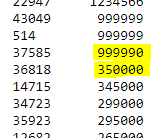

Thus we exclude all the valies in the 'price' column that are greater than $350,000, excluding a total of 14 outlier rows from our data set.

### 2.2.2 Investigating 'price' = 0

In [23]:
autos[autos['price'] == 0].describe()

,price,registration_year,power_ps,odometer_km,registration_month,nr_of_pictures,postal_code
count,1421.0,1421.000000,1421.000000,1421.000000,1421.000000,1421.0,1421.000000
mean,0.0,2016.022519,87.087262,124588.318086,3.723434,0.0,45244.029557
std,0.0,353.020633,403.768237,47790.874888,4.038051,0.0,26203.716073
min,0.0,1500.000000,0.000000,5000.000000,0.000000,0.0,1109.000000
25%,0.0,1996.000000,0.000000,125000.000000,0.000000,0.0,25718.000000
50%,0.0,2000.000000,75.000000,150000.000000,2.000000,0.0,44329.000000
75%,0.0,2005.000000,121.000000,150000.000000,7.000000,0.0,63322.000000
max,0.0,9999.000000,15016.000000,150000.000000,12.000000,0.0,99955.000000


There are a total of 1421 entries which have 'price' = 0. Considering that this is less than 3% of our total data, we remove these rows from our data-set.
Thus, we shall only consider those rows whichh have price ranging from 0 to 350,000 dollars for our analysis, discarding the remaining 3% data, which comprises of outliers.

In [24]:
autos = autos[autos['price'].between(1,351000)]
autos['price'].describe()

count     48564.000000
mean       5889.054794
std        9059.909948
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price, dtype: float64

### 2.3 Investigating *date* columns

In [25]:
autos[['date_crawled','ad_created','last_seen']].describe(include = 'all')

,date_crawled,ad_created,last_seen
count,48564,48564,48564
unique,46881,76,38474
top,2016-03-16 21:50:53,2016-04-03 00:00:00,2016-04-07 06:17:27
freq,3,1887,8


### 2.3.1 Investigating 'registration_year' column

In [26]:
autos['registration_year'].value_counts().sort_index()

1000    1
1001    1
1111    1
1800    2
1910    5
       ..
5911    1
6200    1
8888    1
9000    1
9999    3
Name: registration_year, Length: 95, dtype: int64

In [27]:
autos[~autos['registration_year'].between(1900,2016)]

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
10,2016-03-15 01:41:36,VW_Golf_Tuning_in_siber/grau,privat,Angebot,999,test,NaN,2017,manuell,90,NaN,150000,4,benzin,volkswagen,nein,2016-03-14 00:00:00,0,86157,2016-04-07 03:16:21
55,2016-03-07 02:47:54,Mercedes_E320_AMG_zu_Tauschen!,privat,Angebot,1,test,NaN,2017,automatik,224,e_klasse,125000,7,benzin,mercedes_benz,nein,2016-03-06 00:00:00,0,22111,2016-03-08 05:45:44
65,2016-04-04 19:30:39,Ford_Fiesta_zum_ausschlachten,privat,Angebot,250,control,NaN,2017,manuell,65,fiesta,125000,9,benzin,ford,NaN,2016-04-04 00:00:00,0,65606,2016-04-05 12:22:12
68,2016-04-03 17:36:59,Mini_cooper_s_clubman_/vollausstattung_/_Navi/...,privat,Angebot,10990,test,NaN,2017,manuell,174,clubman,100000,0,NaN,mini,nein,2016-04-03 00:00:00,0,83135,2016-04-05 17:26:26
84,2016-03-27 19:52:54,Renault_twingo,privat,Angebot,900,control,NaN,2018,NaN,60,twingo,150000,0,NaN,renault,NaN,2016-03-27 00:00:00,0,40589,2016-04-05 18:46:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49770,2016-03-15 12:54:26,VW_Polo_6n_Tuev_Neu!__1.6_75PS,privat,Angebot,999,control,NaN,2018,manuell,75,polo,150000,12,benzin,volkswagen,nein,2016-03-15 00:00:00,0,24321,2016-04-06 02:16:02
49796,2016-03-09 09:38:38,Opel_corsa_1.4_zu_verkaufen,privat,Angebot,4500,test,NaN,2017,manuell,90,corsa,70000,7,benzin,opel,nein,2016-03-09 00:00:00,0,88433,2016-03-17 20:45:08
49841,2016-03-11 15:37:02,Passat_abzugeben.,privat,Angebot,600,test,NaN,2017,manuell,101,passat,150000,7,NaN,volkswagen,NaN,2016-03-11 00:00:00,0,53804,2016-03-11 16:41:14
49910,2016-04-03 21:39:15,Schoener_fast_neuer_Opel_Mokka_in_Zell_Mosel_m...,privat,Angebot,22200,test,NaN,9000,automatik,140,andere,10000,3,benzin,opel,NaN,2016-04-03 00:00:00,0,56856,2016-04-05 22:18:26


We observe a total of 1884 cars which have 'registration_year' of their car as either below 1900 (when cars weren't invented), or above 2016 (when this data wasn't recorded yet). Unless one of the users can warp through the space-time continuum and travel through time, these entries should be considered faulty. Since this is less than 4% of our total data, we reject it.

In [28]:
autos = autos[autos['registration_year'].between(1900,2016)]

### 2.3.2 Investigating 'ad_created' column

In [29]:
autos[['ad_created']]

,ad_created
0,2016-03-26 00:00:00
1,2016-04-04 00:00:00
2,2016-03-26 00:00:00
3,2016-03-12 00:00:00
4,2016-04-01 00:00:00
...,...
49995,2016-03-27 00:00:00
49996,2016-03-28 00:00:00
49997,2016-04-02 00:00:00
49998,2016-03-08 00:00:00


In [30]:
autos['ad_created'].str.split()

0        [2016-03-26, 00:00:00]
1        [2016-04-04, 00:00:00]
2        [2016-03-26, 00:00:00]
3        [2016-03-12, 00:00:00]
4        [2016-04-01, 00:00:00]
                  ...          
49995    [2016-03-27, 00:00:00]
49996    [2016-03-28, 00:00:00]
49997    [2016-04-02, 00:00:00]
49998    [2016-03-08, 00:00:00]
49999    [2016-03-13, 00:00:00]
Name: ad_created, Length: 46680, dtype: object

It seems that the time-stamp of ad_created is "00:00:00" for all values. On checking further, we find that all rows have this value of time-stamp. As this data is redundant, we remove this time-stamp from the 'ad_created' column -

In [31]:
autos['ad_created'].str.split().str[1].value_counts(dropna = False)

00:00:00    46680
Name: ad_created, dtype: int64

In [32]:
autos['ad_created'] = autos['ad_created'].str.split().str[0]
autos['ad_created']

0        2016-03-26
1        2016-04-04
2        2016-03-26
3        2016-03-12
4        2016-04-01
            ...    
49995    2016-03-27
49996    2016-03-28
49997    2016-04-02
49998    2016-03-08
49999    2016-03-13
Name: ad_created, Length: 46680, dtype: object

### 2.3.3 Checking for Null or unusual values in date columns

In [33]:
print('Count of Null values in date columns : ')
autos.loc[(autos['ad_created'].isnull()|autos['date_crawled'].isnull()|autos['last_seen'].isnull()),['ad_created','date_crawled','last_seen']].describe(include = 'all')

Count of Null values in date columns : 


,ad_created,date_crawled,last_seen
count,0,0,0
unique,0,0,0
top,NaN,NaN,NaN
freq,NaN,NaN,NaN


We observe that there are no null values in the 3 date columns above and find no irregularities the 'ad_created', last_seen, and date_crawled columns.

In [34]:
print(autos['ad_created'].sort_values())

22781    2015-06-11
20649    2015-08-10
34883    2015-09-09
2243     2015-11-10
27986    2015-12-05
            ...    
34041    2016-04-07
1138     2016-04-07
9363     2016-04-07
20677    2016-04-07
29853    2016-04-07
Name: ad_created, Length: 46680, dtype: object


In [35]:
print(autos['last_seen'].sort_values())

10142    2016-03-05 14:45:46
26924    2016-03-05 14:46:02
30389    2016-03-05 14:49:34
13665    2016-03-05 15:16:11
2469     2016-03-05 15:16:47
                ...         
28       2016-04-07 14:58:48
37578    2016-04-07 14:58:48
36236    2016-04-07 14:58:50
25429    2016-04-07 14:58:50
24225    2016-04-07 14:58:50
Name: last_seen, Length: 46680, dtype: object


In [36]:
print(autos['date_crawled'].sort_values())

29899    2016-03-05 14:06:30
26440    2016-03-05 14:06:40
20681    2016-03-05 14:07:04
9524     2016-03-05 14:07:21
25599    2016-03-05 14:07:26
                ...         
7982     2016-04-07 14:30:09
20941    2016-04-07 14:30:26
4752     2016-04-07 14:36:44
4378     2016-04-07 14:36:55
16947    2016-04-07 14:36:56
Name: date_crawled, Length: 46680, dtype: object


#### Observations : There are no null/unusual values in the mentioned date columns

## 2.4 Investigating columns with low unique values
On glancing at the first and last five rows of our data-set, it appears that 'seller','offer_type' and 'nr_of_pictures' have same values in many indexes of their columns. Investigating this - 

In [37]:
autos['nr_of_pictures'] = autos['nr_of_pictures'].astype(str)
autos[['offer_type','nr_of_pictures','seller']].describe(include = 'all')

,offer_type,nr_of_pictures,seller
count,46680,46680,46680
unique,1,1,1
top,Angebot,0,privat
freq,46680,46680,46680


For the above 3 columns, there is only 1 distinct value for index of each column. Thus, we drop-off these columns and remove them.

In [38]:
autos = autos.drop(['seller','offer_type','nr_of_pictures'], axis = 1)

## 3. Exploring Cleaned Data - Aggregating by Brand
Having cleaned data to identify and exclude any outliers, unusual values, and null values that may have affected our analysis, we move on to exploring our data for any patterns and inferences.

In [39]:
autos['brand'].value_counts(dropna = False)

volkswagen        9862
bmw               5137
opel              5022
mercedes_benz     4503
audi              4041
ford              3263
renault           2200
peugeot           1393
fiat              1197
seat               853
skoda              766
nissan             713
mazda              709
smart              661
citroen            654
toyota             593
hyundai            468
sonstige_autos     458
volvo              427
mini               409
mitsubishi         384
honda              366
kia                330
alfa_romeo         310
porsche            286
suzuki             277
chevrolet          266
chrysler           164
dacia              123
daihatsu           117
jeep               106
subaru             100
land_rover          98
saab                77
jaguar              73
daewoo              70
trabant             65
rover               62
lancia              50
lada                27
Name: brand, dtype: int64

In [40]:
autos[:2]

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04,71034,2016-04-06 14:45:08


### 3.1 Average Price per Brand (for Most Common Brands)

In [41]:
avg_price_by_brand = {}

brands = autos['brand'].unique()

for b in brands:
    avg_price = autos.loc[autos['brand']==b,'price'].mean()
    avg_price_by_brand[b] = avg_price
    
avg_price_by_brand

{'peugeot': 3094.0172290021537,
 'bmw': 8332.820517811953,
 'volkswagen': 5402.410261610221,
 'smart': 3580.2239031770046,
 'ford': 3749.4695065890287,
 'chrysler': 3465.743902439024,
 'seat': 4397.230949589683,
 'renault': 2475.944090909091,
 'mercedes_benz': 8628.450366422385,
 'audi': 9336.687453600594,
 'sonstige_autos': 12338.550218340612,
 'opel': 2975.2419354838707,
 'mazda': 4112.596614950635,
 'porsche': 45643.93706293706,
 'mini': 10613.459657701711,
 'toyota': 5167.091062394604,
 'dacia': 5915.528455284553,
 'nissan': 4743.40252454418,
 'jeep': 11650.5,
 'saab': 3211.6493506493507,
 'volvo': 4946.501170960188,
 'mitsubishi': 3394.5729166666665,
 'jaguar': 11635.493150684932,
 'fiat': 2813.748538011696,
 'skoda': 6368.0,
 'subaru': 3953.29,
 'kia': 5982.330303030303,
 'citroen': 3779.1391437308866,
 'chevrolet': 6684.139097744361,
 'hyundai': 5365.254273504273,
 'honda': 4107.857923497268,
 'daewoo': 1049.0,
 'suzuki': 4096.732851985559,
 'trabant': 1790.8615384615384,
 'land

For the sake of simplicity, we will focus only on the most common brands (which corresponds to approximately 66% of the total car brands in our Ebay Car Sales data) - 

In [42]:
brand_fraction = autos['brand'].value_counts(normalize = True)
top_brands = brand_fraction[brand_fraction>0.05]
top_brands

volkswagen       0.211268
bmw              0.110047
opel             0.107584
mercedes_benz    0.096465
audi             0.086568
ford             0.069901
Name: brand, dtype: float64

In [43]:
avg_price_by_brand = {}

brands = top_brands.index

for brand in brands:
    avg_price_by_brand[brand] = round(autos.loc[autos['brand']==brand,'price'].mean(),2)

# create a series from dictionary using the "pandas.Series" constructor
mpb_series = pandas.Series(avg_price_by_brand).sort_values(ascending = True)
# create a df from series using the "pandas.DataFrame" constructor

# mpb --> Mean Price per Brand

mpb_df = pandas.DataFrame(mpb_series, columns = ['mean_price'])
mpb_df

,mean_price
opel,2975.24
ford,3749.47
volkswagen,5402.41
bmw,8332.82
mercedes_benz,8628.45
audi,9336.69


Of the top most common brands - 
* Audi has the greatest average price of 9336.7 Dollars, and 
* Opel has the lowest average price of 2975.2 Dollars

### 3.2 Average kms (on Odometer) per Brand
Again, we refer to the top most common brands in our dataset.

In [44]:
avg_kms_by_brand = {}

for brand in brands:
    avg_kms_by_brand[brand] = round(autos.loc[autos['brand']==brand,'odometer_km'].mean(),2)
    
# create a series from dictionary using the "pandas.Series" constructor
mkb_series = pandas.Series(avg_kms_by_brand).sort_values(ascending = True)
# create a df from series using the "pandas.DataFrame" constructor

# mkb --> Mean Kms per Brand
mkb_df = pandas.DataFrame(mkb_series, columns = ['mean_kms'])
mkb_df

,mean_kms
ford,124266.01
volkswagen,128707.16
audi,129157.39
opel,129310.04
mercedes_benz,130788.36
bmw,132572.51


Of the top most common brands - 
1. BMW has the highest average km reading on odometer of 132,571 kms, while 
2. Ford has the lowest average km reading of 124,266 kms.

### 3.3 Average kms run by a car per Fuel Type
To calculate this, we first calculate the number of vehicles per 'fuel_type'. Out of 44,000+ cars, almost all cars run on diesel and benzin. Therefore, we will not count other fuel types in this analysis.

In [45]:
autos['fuel_type'].value_counts().sort_values()

andere        15
elektro       19
hybrid        37
cng           71
lpg          649
diesel     14032
benzin     28539
Name: fuel_type, dtype: int64

In [46]:
autosf = autos[(autos['fuel_type']=='benzin')|(autos['fuel_type']=='diesel')]
autosf[:5]

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01,39218,2016-04-01 14:38:50
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,7900,test,bus,2006,automatik,150,voyager,150000,4,diesel,chrysler,NaN,2016-03-21,22962,2016-04-06 09:45:21


In [47]:
kms_per_fuel_type = {}

fuel_type = autosf['fuel_type'].unique()

for fuel in fuel_type:
    kms_per_fuel_type[fuel] = round(autos.loc[autos['fuel_type']==fuel,'odometer_km'].mean(),1)

# mkf --> Mean Kms per Fuel
mkf_series = pandas.Series(kms_per_fuel_type)
mkf_df = pandas.DataFrame(mkf_series,columns = ['Mean Kms'])
mkf_df

,Mean Kms
benzin,122360.8
diesel,131418.5


We can infer that diesel fuelled cars on Ebay are run about 9000 kms more than benzin fuelled cars.

### 3.4 Average price of a car per Fuel Type
For this analysis too, we shall consider only benzin and diesel fuelled cars.

On finding the average price, we find that -
1. Cars running on Benzin fuel cost an average of 5,000 dollars.
2. Cars running on Diesel cost a lot more than Benzin cars - almost 8,600 dollars

In [48]:
price_per_fuel_type = {}

for fuel in fuel_type:
    price_per_fuel_type[fuel] = round(autos.loc[autos['fuel_type']==fuel,'price'].mean(),1)

# mpf --> Mean Price per Fuel
mpf_series = pandas.Series(price_per_fuel_type)
mpf_df = pandas.DataFrame(mpf_series,columns = ['Mean Price'])
mpf_df

,Mean Price
benzin,5055.3
diesel,8583.9


# 4. Conclusion for Ebay Car Sales Data
### 4.1 Average Price of Top 5 most common Car Brands
Opel is the cheapest car, while Audi is the costliest car on average.
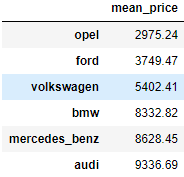
### 4.2 Average kms run  by Top 5 most common Car Brands
On an average, almost all common car brands are run in the 12,400 to 13,200 kms range
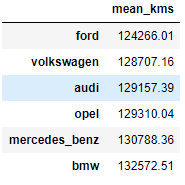
### 4.3 Average kms run by Cars per Fuel Type
Benzin and Diesel run cars are most common in Germany (our data comprises of 98% cars that are run on these 2 fuels alone)
We find that Benzin fueled cars are run about 9,000 kms less on an average than Diesel fueled cars.
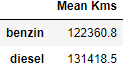
### 4.4 Average Price of a Car per Fuel Type
Diesel cars cost 70% more than Benzin fueled cars!
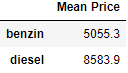

Author - Raghav_A